Set up environment

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Load data file and run initial inspection

In [4]:
    # Load the dataset
health_import = pd.read_csv('HEALTH.csv')

    # Inspect
print(health_import.info())
print(health_import.tail())
print(health_import.describe())
print(health_import.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      740 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

Find variables that have more than 12 unique values  
Will want to consolidate categories as able

In [6]:
    # Display unique values for categorical columns (up to 15 values)
categorical_columns = health_import.select_dtypes(include=['object']).columns
for col in categorical_columns:
   print(f"\nUnique values in {col}: {health_import[col].unique()[:12]}")


Unique values in Timestamp: ['8/27/2014 11:29' '8/27/2014 11:30' '8/27/2014 11:31' '8/27/2014 11:32'
 '8/27/2014 11:33' '8/27/2014 11:34' '8/27/2014 11:35' '8/27/2014 11:36'
 '8/27/2014 11:37' '8/27/2014 11:38' '8/27/2014 11:39' '8/27/2014 11:40']

Unique values in Gender: ['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?']

Unique values in Country: ['United States' 'Canada' 'United Kingdom' 'Bulgaria' 'France' 'Portugal'
 'Netherlands' 'Switzerland' 'Poland' 'Australia' 'Germany' 'Russia']

Unique values in state: ['IL' 'IN' nan 'TX' 'TN' 'MI' 'OH' 'CA' 'CT' 'MD' 'NY' 'NC']

Unique values in self_employed: [nan 'Yes' 'No']

Unique values in family_history: ['No' 'Yes']

Unique values in treatment: ['Yes' 'No']

Unique values in work_interfere: ['Often' 'Rarely' 'Never' 'Sometimes' nan]

Unique values in no_employees: ['25-Jun' 'More than 1000' '26-100' '100-500' '5-Jan' '500-1000']

Unique values in remote_work: ['No'

INSPECT 'comments'  
The question has very few responses (13%) and very few ADD to the mental health picture: DROP  
  
INSPECT 'Timestamp'

In [8]:
print(health_import['Timestamp'].head(20)), (health_import['Timestamp'].tail(20))

0     8/27/2014 11:29
1     8/27/2014 11:29
2     8/27/2014 11:29
3     8/27/2014 11:29
4     8/27/2014 11:30
5     8/27/2014 11:31
6     8/27/2014 11:31
7     8/27/2014 11:32
8     8/27/2014 11:32
9     8/27/2014 11:32
10    8/27/2014 11:32
11    8/27/2014 11:32
12    8/27/2014 11:33
13    8/27/2014 11:33
14    8/27/2014 11:33
15    8/27/2014 11:34
16    8/27/2014 11:34
17    8/27/2014 11:34
18    8/27/2014 11:34
19    8/27/2014 11:35
Name: Timestamp, dtype: object


(None,
 1239      4/4/2015 11:22
 1240      4/6/2015 14:58
 1241     4/11/2015 14:35
 1242     4/23/2015 14:03
 1243      5/5/2015 14:22
 1244      5/5/2015 15:16
 1245      5/6/2015 10:14
 1246      5/6/2015 16:55
 1247      5/7/2015 10:08
 1248     6/25/2015 12:24
 1249     7/22/2015 18:57
 1250     7/27/2015 23:25
 1251      8/17/2015 9:38
 1252     8/20/2015 16:52
 1253     8/25/2015 19:59
 1254     9/12/2015 11:17
 1255      9/26/2015 1:07
 1256     11/7/2015 12:36
 1257    11/30/2015 21:25
 1258      2/1/2016 23:04
 Name: Timestamp, dtype: object)

'Timestamp' appears to be WHEN each subject completed the survey.  
Dates range from August 2014 through February 2016.  
Likely kept as the identifier; no value to the feature: DROP

In [10]:
    # Drop undesired columns
health_inspect1 = health_import.drop(columns=['Timestamp', 'comments'])

INSPECT  'Age'
Eight 'Age' values immediatetly stand out as eroneous; in the outlier areas
Will replace all values outside 18 to 72 with mean value

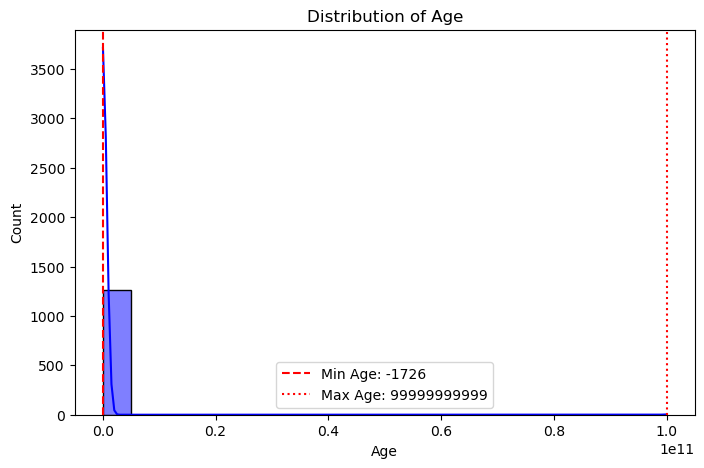

count    1259.000000
mean       32.073868
std         7.265580
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64


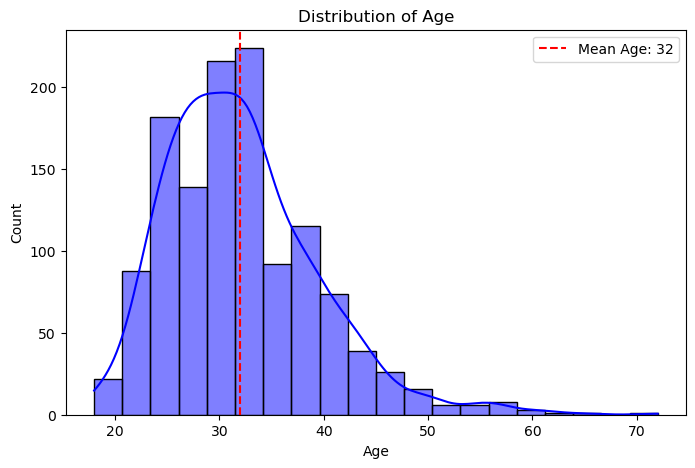

In [12]:
    # Identify the minimum and maximum values in the 'Age' column
min_age = health_inspect1['Age'].min()
max_age = health_inspect1['Age'].max()

    # Plot distribution
plt.figure(figsize=(8,5))
sns.histplot(health_inspect1['Age'], bins=20, kde=True, color="blue")
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.axvline(min_age, color='red', linestyle='dashed', label=f"Min Age: {min_age}")
plt.axvline(max_age, color='red', linestyle='dotted', label=f"Max Age: {max_age}")
plt.legend()
plt.show()

    # Make a copy to progress
health_inspect2 = health_inspect1.copy()

    # Ensure all ages are positive (change -29 to 29)
health_inspect2['Age'] = health_inspect2['Age'].abs()

    # Get mean of ages 18 to 72
test_1 = health_inspect2[(health_inspect2['Age'] > 17) & (health_inspect2['Age'] < 73)]
mean_age = int(test_1['Age'].mean())

    # Replace all outliers (17>Age<73) with the mean
health_inspect2.loc[(health_inspect2['Age'] < 17) | (health_inspect2['Age'] > 73), 'Age'] = mean_age

    # Confirm
print(health_inspect2['Age'].describe())

    # Plot cleaned Age distribution
plt.figure(figsize=(8,5))
sns.histplot(health_inspect2['Age'], bins=20, kde=True, color="blue")
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.axvline(mean_age, color='red', linestyle='dashed', label=f"Mean Age: {mean_age}")
plt.ylabel("Count")
plt.legend()
plt.show()

INSPECT 'Gender', stands out as needing inspection  
Keep all reports when reducing to minimal categories

In [14]:
    # Gender has over 12 values listed
health_inspect2['Gender'].value_counts(dropna=False).sort_index(ascending=False)

    # Make a copy to progress
health_transform = health_inspect2.copy()

    # Transform gender into three groups: '0', '1', '-1'
def categorize_gender(value):
    # Normalize strings
   value = str(value).strip().lower()  
    
    # Define known male / female identifiers, categorize undefined or ambiguous gender values
   female_cat = {'female', 'f', 'woman', 'cis female', 'cis-female/femme', 'femake', 
                         'femail', 'female (cis)'}
   male_cat = {'male', 'm', 'man', 'cis male', 'cis man', 'malr', 'mal', 'mail', 
                        'make', 'msle', 'maile', 'male-ish', 'male (cis)', 'something kinda male?',
                        'ostensibly male, unsure what that really means', 'male leaning androgynous',
                        'Guy (-ish) ^_^', }

   if value in female_cat: return '0'
   elif value in male_cat: return '1'
   else:                   return '-1'  

    # Apply the categorization to the Gender column
health_transform.loc[:, 'Gender'] = health_transform['Gender'].apply(categorize_gender)

    # Confirm
health_transform['Gender'].value_counts().sort_index()

Gender
-1     18
0     247
1     994
Name: count, dtype: int64

Goal is to compare USA vs Other countries,  
the 18 Gender reports (neither Male, nor Female) will not need to be dropped now,  
keep as Other  

INSPECT 'Country'

In [16]:
    # Make a copy to progress
health_tform2 = health_transform.copy()

    # Alter 'Country': US -> 1, all Other -> 0
health_tform2['Country'] = health_tform2['Country'].apply(lambda x: 1 if x == 'United States' else 0)
health_tform2['Country'] = health_tform2['Country'].astype('category')

    # Replace NA values in 'state' with 'XX'
health_tform2['state'] = health_tform2['state'].fillna('XX')

    # Confirm
print(health_tform2['Country'].value_counts())

Country
1    751
0    508
Name: count, dtype: int64


INSPECT 'self_employed'

In [18]:
    # Change missing values in 'self_employed' to 'No'; employed by tech company
health_tform2.fillna({'self_employed': 'No'}, inplace=True)

    # Confirm
health_tform2['self_employed'].value_counts(dropna=False)

self_employed
No     1113
Yes     146
Name: count, dtype: int64

INSPECT 'work_interfere'  
interpolate missing values

In [20]:
    # Make a copy to progress
health_tform3 = health_tform2.copy()

    # With 260 NA, do not want to drop all, convert for interpolation
work_interfere_map = {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Often': 3}

    # Convert to numerical values for interpolation
health_tform3['work_interfere'] = health_tform3['work_interfere'].map(work_interfere_map)

    # Perform linear interpolation
health_tform3['work_interfere'] = health_tform3['work_interfere'].interpolate(method='linear')

    # Convert to ordered categorical
health_tform3['work_interfere'] = pd.Categorical(
    health_tform3['work_interfere'].round().astype(int),
    categories=[0, 1, 2, 3], 
    ordered=True)

    # Confirm
health_tform3['work_interfere'].isna().sum(), health_tform3['work_interfere'].dtype

(0,
 CategoricalDtype(categories=[0, 1, 2, 3], ordered=True, categories_dtype=int64))

Fix 'no_employees' and transform into numerical cats

In [22]:
    # Make a copy to progress
health_tform4 = health_tform3.copy()

    # Correct misinterpreted values in number of employees
health_tform4['no_employees'] = health_tform4['no_employees'].replace({
    '5-Jan': '1-5', 
    '25-Jun': '6-25'})

    # Define mapping based on below rules
employee_category_map = {'1-5': 0, '6-25': 0,                 # SMALL : 1-25 employees→ 0
                         '26-100': 1, '100-500': 1,           # MEDIUM : 26-500 employees→ 1
                         '500-1000': 2, 'More than 1000': 2}  # LARGE : 500+ employees→ 2

    # Convert 'no_employees' 
health_tform4['no_employees'] = health_tform4['no_employees'].map(employee_category_map)

    # Keep as ordered categorical
health_tform4['no_employees'] = pd.Categorical(
    health_tform4['no_employees'], 
    categories=[0, 1, 2], 
    ordered=True)

In [23]:
# Confirm
health_tform4['no_employees'].dtype

CategoricalDtype(categories=[0, 1, 2], ordered=True, categories_dtype=int64)

In [65]:
    # Change 'Don't know' and 'Not sure' to 'No'
    # Questions similar to "Do you know the options for mental health care your employer provides?"
health_tform4 = health_tform4.map(
    lambda x: 'No' if isinstance(x, str) and x.strip().lower() in ["don't know", "not sure"] else x)

In [67]:
    # Change 'Some of them' to 'Yes'
    # Questions similar to "Willing to discuss your mental health with a supervisor?"
health_tform5 = health_tform4.map(
    lambda x: 'Yes' if isinstance(x, str) and x.strip().lower() in ['some of them'] else x)

In [69]:
    # Change other columns to categorical with Yes/No and a few Maybe
bi_columns = ['self_employed', 'family_history', 'treatment', 'remote_work', 'tech_company', 
              'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 
              'mental_health_consequence', 'phys_health_consequence', 'mental_health_interview', 
              'phys_health_interview', 'coworkers', 'supervisor', 'mental_vs_physical', 'obs_consequence']

    # To fix warning
pd.set_option('future.no_silent_downcasting', True)

    # Convert Yes/No to 1/0 and Maybe to -1
health_tform5[bi_columns] = (health_tform5[bi_columns]
    .replace({'No': 0, 'Yes': 1, 'Maybe': '-1'})
    .astype('category'))

In [71]:
    # Convert remaining object columns to categorical
object_columns = health_tform5.select_dtypes(include=['object']).columns.tolist()
for col in object_columns:
   health_tform5[col] = health_tform5[col].astype('category')
    
    # Verify the unique values to confirm the transformation
print(health_tform5[bi_columns].nunique())

self_employed                2
family_history               2
treatment                    2
remote_work                  2
tech_company                 2
benefits                     2
care_options                 2
wellness_program             2
seek_help                    2
anonymity                    2
mental_health_consequence    3
phys_health_consequence      3
mental_health_interview      3
phys_health_interview        3
coworkers                    2
supervisor                   2
mental_vs_physical           2
obs_consequence              2
dtype: int64


In [73]:
    # Make a final copy of the cleaned dataset
health_df = health_tform5.copy()

    # Confirm
print(health_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Age                        1259 non-null   int64   
 1   Gender                     1259 non-null   category
 2   Country                    1259 non-null   category
 3   state                      1259 non-null   category
 4   self_employed              1259 non-null   category
 5   family_history             1259 non-null   category
 6   treatment                  1259 non-null   category
 7   work_interfere             1259 non-null   category
 8   no_employees               1259 non-null   category
 9   remote_work                1259 non-null   category
 10  tech_company               1259 non-null   category
 11  benefits                   1259 non-null   category
 12  care_options               1259 non-null   category
 13  wellness_program           1259 n

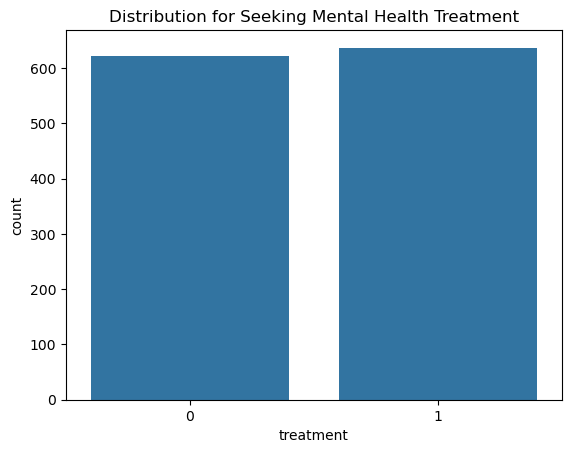

In [75]:
    # Check target variable balance
sns.countplot(x='treatment', data=health_df)
plt.title("Distribution for Seeking Mental Health Treatment")
plt.show()

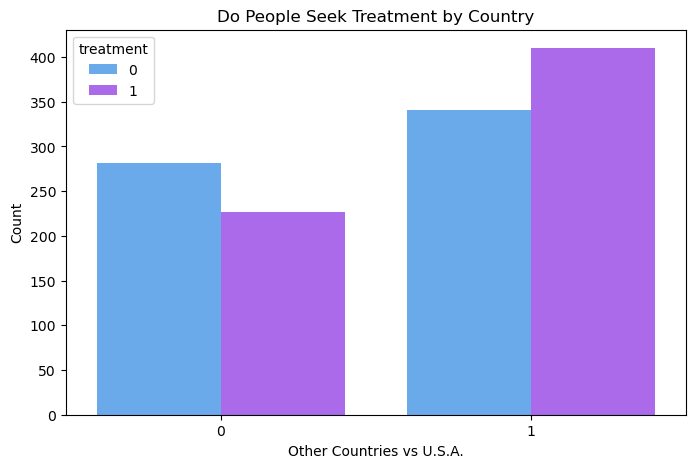

In [77]:
plt.figure(figsize=(8,5))
sns.countplot(x='Country', hue='treatment', data=health_df, palette='cool')
plt.title("Do People Seek Treatment by Country")
plt.xlabel("Other Countries vs U.S.A.")
plt.ylabel("Count")
plt.show()

In [78]:
import itertools
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

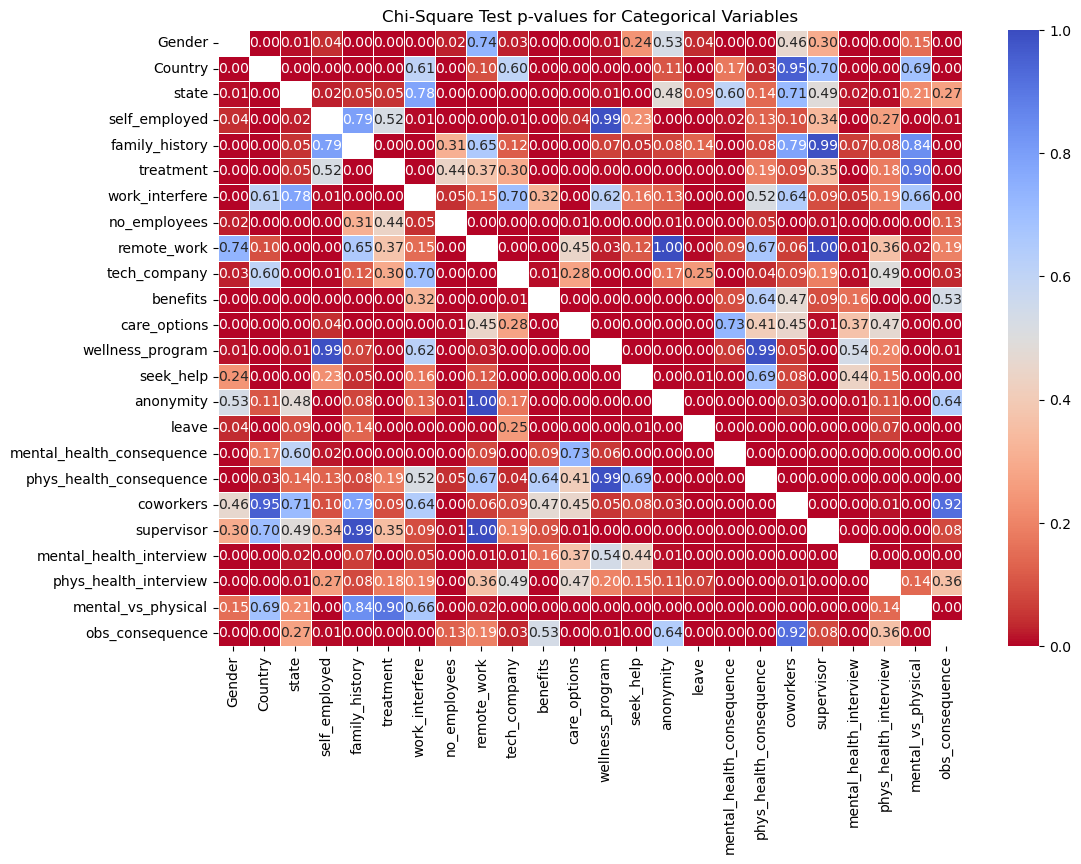

In [81]:
    # Function to calculate Chi-Square p-value
def chi_square_test(x, y):
   """Perform Chi-Square test of independence and return p-value."""
   contingency_table = pd.crosstab(x, y)
   chi2, p, _, _ = stats.chi2_contingency(contingency_table)
   return p

    # Select categorical columns
categorical_columns = health_df.select_dtypes(include=['category']).columns.tolist()

    # Compute Cramér's V and Chi-Square tests for all categorical variable pairs
chi_square_results = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for col1, col2 in itertools.combinations(categorical_columns, 2):
   chi_square_results.loc[col1, col2] = chi_square_test(health_df[col1], health_df[col2])
   chi_square_results.loc[col2, col1] = chi_square_results.loc[col1, col2] 

    # Convert results to numeric for readability
chi_square_results = chi_square_results.astype(float)

    # Display the Chi-Square test results heatmap (p-values)
plt.figure(figsize=(12, 8))
sns.heatmap(chi_square_results, annot=True, cmap='coolwarm_r', fmt='.2f', linewidths=0.5)
plt.title("Chi-Square Test p-values for Categorical Variables")
plt.show()

In [82]:
    # Make a copy to progress
health_test2 = health_df.drop(columns=['state', 'Age']) # 

    # Convert 'leave' to ordered categorical
health_test2['leave'] = pd.Categorical(
    health_test2['leave'],
    categories=["Don't know", "Very easy", "Somewhat easy", "Somewhat difficult", "Very difficult"],
    ordered=True)

    # Rename categories
leave_mapping = {
    "Don't know": 0,
    "Very easy": 1,
    "Somewhat easy": 2,
    "Somewhat difficult": 3,
    "Very difficult": 4}

health_test2['leave'] = health_test2['leave'].cat.rename_categories(leave_mapping)

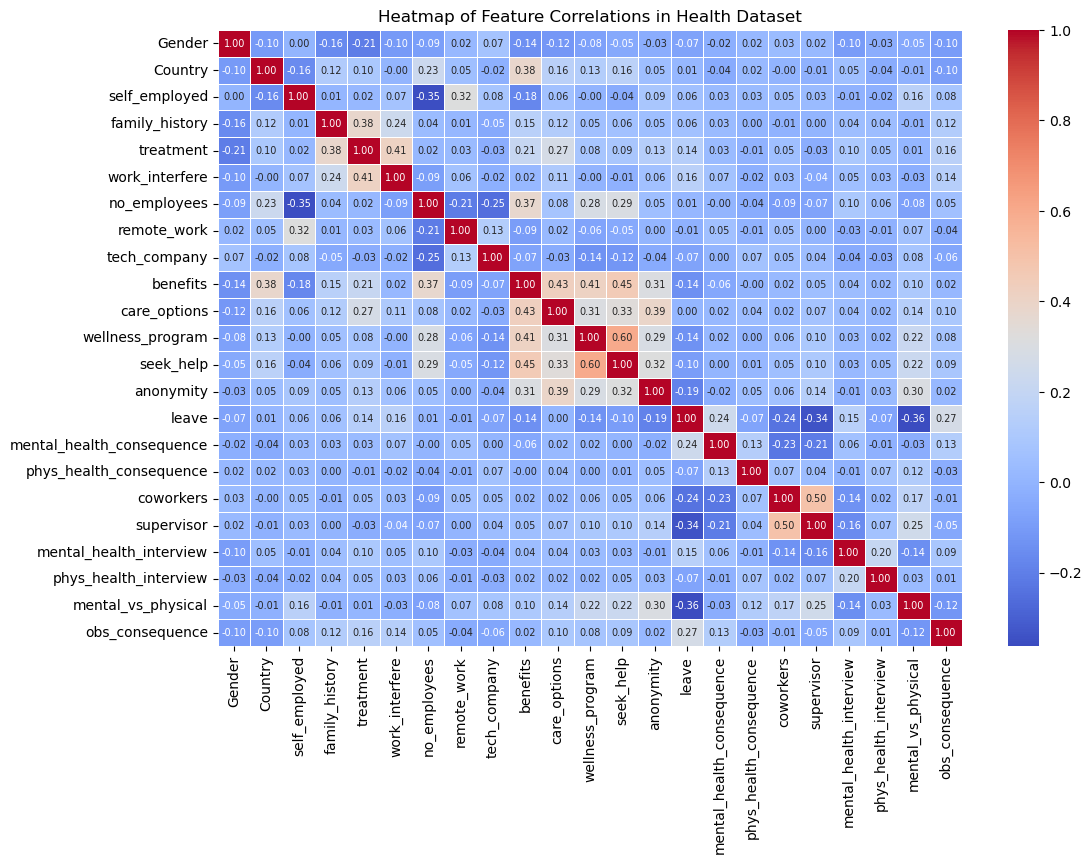

In [85]:
    # Calculate correlation matrix
corr_matrix = health_test2.corr()

    # Display heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, annot_kws={"size": 7}, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Feature Correlations in Health Dataset")
plt.show()

In [86]:
    # Encode dummy Vars
health_dum = pd.get_dummies(health_test2, drop_first=True)
health_dum

,Gender_0,Gender_1,Country_1,self_employed_1,family_history_1,treatment_1,work_interfere_1,work_interfere_2,work_interfere_3,no_employees_1,...,phys_health_consequence_1,phys_health_consequence_-1,coworkers_1,supervisor_1,mental_health_interview_1,mental_health_interview_-1,phys_health_interview_1,phys_health_interview_-1,mental_vs_physical_1,obs_consequence_1
0,True,False,True,False,False,True,False,False,True,False,...,False,False,True,True,False,False,False,True,True,False
1,False,True,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,True,False,False,False,...,False,False,True,True,True,False,True,False,False,False
3,False,True,False,False,True,True,False,False,True,True,...,True,False,True,False,False,True,False,True,False,True
4,False,True,True,False,False,False,False,False,False,True,...,False,False,True,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,False,True,False,False,False,True,False,True,False,True,...,False,False,True,True,False,False,False,False,False,False
1255,False,True,True,False,True,True,False,False,True,True,...,False,False,True,True,False,False,False,False,True,False
1256,False,True,True,False,True,True,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
1257,True,False,True,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False


In [87]:
    # Define features and target variable
X = health_dum.drop(columns=['treatment_1'])
y = health_dum['treatment_1']

    # Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=500)

In [91]:
    # Initialize Logistic Regression Model
log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train, y_train)

    # Predictions with probability
y_log_predict = log_model.predict(X_test)
y_log_proba = log_model.predict_proba(X_test)[:, 1]

print('Log Accuracy:', accuracy_score(y_test, y_log_predict))
print('Logistic Regression Probability Predictions:\n', y_log_proba)
print('Log F1 score:', f1_score(y_test, y_log_predict))
print('Log Confusion Matrix:\n', confusion_matrix(y_test, y_log_predict))
print('Log Classification Report:\n', classification_report(y_test, y_log_predict))

Log Accuracy: 0.7103174603174603
Logistic Regression Probability Predictions:
 [0.24694241 0.03423132 0.05722536 0.17880819 0.95841748 0.81708474
 0.90094635 0.3825302  0.13847108 0.69559996 0.23686412 0.14735581
 0.53226993 0.32101954 0.50184176 0.76123627 0.48375688 0.11825245
 0.22062204 0.39389183 0.42572726 0.21422875 0.06621856 0.35916924
 0.75712505 0.49528936 0.65783085 0.32708298 0.90960332 0.86584652
 0.92690972 0.27642032 0.34328985 0.23492358 0.79856694 0.07078627
 0.48517867 0.89567633 0.63116711 0.04850625 0.25466045 0.63636292
 0.99210801 0.15372014 0.26534842 0.91536671 0.29852196 0.10748571
 0.87200417 0.6759476  0.45630209 0.86824606 0.80215229 0.21334355
 0.8462729  0.24783081 0.63475101 0.46187947 0.44437779 0.42268926
 0.55918155 0.77050963 0.19933747 0.51509414 0.72532777 0.77300884
 0.82540794 0.65655496 0.17491757 0.81853988 0.12365386 0.68513391
 0.05951608 0.53021179 0.05140137 0.04934797 0.85952703 0.61049579
 0.07279094 0.96325538 0.22710467 0.67628094 0.517

In [93]:
    # Initialize SVM Model (Kernel for Nonlinearity)
svm_model = SVC(kernel='rbf', C=1.0, probability=True, random_state=500)
svm_model.fit(X_train, y_train)

    # Make Predictions w probabilities
y_svm_predict = svm_model.predict(X_test)
y_svm_proba = svm_model.predict_proba(X_test)[:, 1] 

    # Classification Metrics
print('SVM Accuracy:', accuracy_score(y_test, y_svm_predict))
print('Support Vector Machine Probability Predictions:\n', y_svm_proba)
print('SVM F1 Score:', f1_score(y_test, y_svm_predict))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_svm_predict))
print('Classification Report:\n', classification_report(y_test, y_svm_predict))

SVM Accuracy: 0.7380952380952381
Support Vector Machine Probability Predictions:
 [0.23463962 0.07800895 0.09926893 0.40212058 0.92624603 0.79912414
 0.88381498 0.41233755 0.1660643  0.82759921 0.17797161 0.29885076
 0.49249867 0.38939915 0.5        0.67182842 0.65487897 0.1313065
 0.20389974 0.18951161 0.6477974  0.23569512 0.14540162 0.2552478
 0.73496041 0.61788764 0.69821422 0.17597761 0.89929803 0.79534658
 0.91733176 0.38446047 0.4000179  0.24210936 0.62588397 0.11287157
 0.66362035 0.85493101 0.7098863  0.05226519 0.23108466 0.56340365
 0.89827095 0.12263606 0.35212304 0.87394315 0.18779171 0.15350778
 0.84899363 0.73934375 0.63082835 0.8312326  0.85429523 0.15834179
 0.78059661 0.26408146 0.49128574 0.58480479 0.73864307 0.36540158
 0.65495932 0.69565163 0.45784837 0.36753474 0.84056622 0.81455291
 0.86850512 0.81299117 0.39800765 0.81429591 0.46934435 0.69942301
 0.14186978 0.34832625 0.05616797 0.08363107 0.86977856 0.60826076
 0.31685149 0.93734078 0.45297453 0.74619127 0.69

In [101]:
    # Feature Importance (Coefficients), ensure array is 1-dimensional
log_features = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': log_model.coef_.ravel()  
}).sort_values(by='Coefficient', ascending=False)

log_features['Odds Ratio'] = np.exp(log_features['Coefficient'])
pd.options.display.float_format = '{:.2f}'.format
print(log_features)

                         Feature  Coefficient  Odds Ratio
7               work_interfere_3         2.79       16.27
6               work_interfere_2         1.77        5.85
5               work_interfere_1         1.38        3.98
4               family_history_1         1.28        3.59
13                care_options_1         0.95        2.59
25                   coworkers_1         0.66        1.94
12                    benefits_1         0.53        1.70
21   mental_health_consequence_1         0.52        1.69
22  mental_health_consequence_-1         0.44        1.55
29       phys_health_interview_1         0.35        1.42
27     mental_health_interview_1         0.34        1.40
32             obs_consequence_1         0.32        1.38
16                   anonymity_1         0.27        1.31
20                       leave_4         0.25        1.28
19                       leave_3         0.21        1.23
8                 no_employees_1         0.08        1.08
30      phys_h

In [109]:
    # Compute permutation importance
perm_importance = permutation_importance(svm_model, X_test, y_test, 
                scoring='accuracy', n_repeats=10, random_state=500)

    # Store df
feature_importance_svm = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': perm_importance.importances_mean 
}).sort_values(by='Importance', ascending=False)

    # Display feature importance
print(feature_importance_svm)

                         Feature  Importance
4               family_history_1        0.11
6               work_interfere_2        0.05
7               work_interfere_3        0.03
13                care_options_1        0.03
5               work_interfere_1        0.03
25                   coworkers_1        0.02
30      phys_health_interview_-1        0.02
1                       Gender_1        0.01
32             obs_consequence_1        0.01
12                    benefits_1        0.01
10                 remote_work_1        0.01
31          mental_vs_physical_1        0.01
17                       leave_1        0.01
27     mental_health_interview_1        0.01
16                   anonymity_1        0.01
15                   seek_help_1        0.01
20                       leave_4        0.01
3                self_employed_1        0.01
29       phys_health_interview_1        0.01
0                       Gender_0        0.01
2                      Country_1        0.00
8         

Compare model metrics

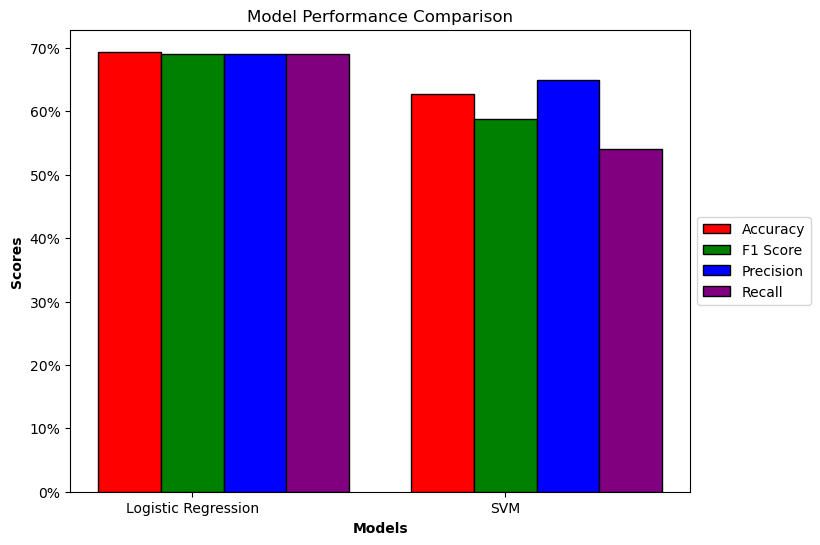

In [111]:
import matplotlib.ticker as mtick

    # Model names and metrics
models = ['Logistic Regression', 'SVM']
accuracy = [0.694, 0.627]
f1score = [0.691, 0.588]
precision = [0.69, 0.65]
recall = [0.69, 0.54]

    # Bar options
bar_width = 0.2

    # Set positions for bars
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

     # Plot Bar chart Metrics
plt.figure(figsize=(8,6))
plt.bar(r1, accuracy, color='red', width=bar_width, edgecolor='black', label='Accuracy')
plt.bar(r2, f1score, color='green', width=bar_width, edgecolor='black', label='F1 Score')
plt.bar(r3, precision, color='blue', width=bar_width, edgecolor='black', label='Precision')
plt.bar(r4, recall, color='purple', width=bar_width, edgecolor='black', label='Recall')
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.title("Model Performance Comparison")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Show the distribution of Country_1

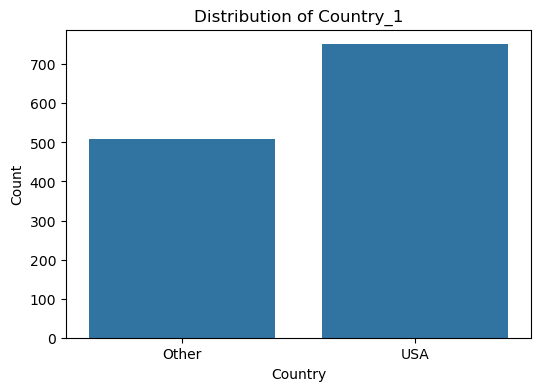

In [114]:
    # Plot
plt.figure(figsize=(6,4))
sns.countplot(x=health_dum['Country_1'])
plt.xticks(ticks=[0,1], labels=["Other", "USA"])
plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Distribution of Country_1")
plt.show()

Tried Utilizing TensorFlow, but it is not compatible with the latest version of Python  
Run LSTM DL functions

In [117]:
import torch
import torch.nn as nn
import torch.optim as optim

    # Define LSTM Model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # Take the last time step output
        return out

    # Example: Define model
input_size = 12
hidden_size = 256
output_size = 1  # Binary classification (0 or 1)
model = LSTMModel(input_size, hidden_size, output_size)

    # Define Loss and Optimizer
criterion = nn.BCEWithLogitsLoss()  # For binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Ensure Data is Properly Shaped
X_train = torch.randn(600, 6, input_size)  # 600 samples, sequence length 6, features 12
y_train = torch.randint(0, 2, (600,), dtype=torch.float32)  # Binary labels (0 or 1)

X_test = torch.randn(150, 6, input_size)  # 150 test samples
y_test = torch.randint(0, 2, (150,), dtype=torch.float32)  # ✅ FIXED: Should match 150 samples

    # Training Loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train).squeeze()
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

    # **Evaluation on Test Set**
model.eval()
with torch.no_grad():
    y_test_logits = model(X_test).squeeze()
    y_test_pred = torch.sigmoid(y_test_logits).round()  # Convert logits to 0 or 1

    # Convert to NumPy for sklearn metrics
y_test_np = y_test.numpy()
y_test_pred_np = y_test_pred.numpy()

# **Classification Metrics**
print('LSTM Accuracy:', accuracy_score(y_test_np, y_test_pred_np))
print('LSTM F1 Score:', f1_score(y_test_np, y_test_pred_np))
print('LSTM Precision:', precision_score(y_test_np, y_test_pred_np))
print('LSTM Recall:', recall_score(y_test_np, y_test_pred_np))


Epoch [5/10], Loss: 0.6895
Epoch [10/10], Loss: 0.6840
LSTM Accuracy: 0.44
LSTM F1 Score: 0.5483870967741935
LSTM Precision: 0.45535714285714285
LSTM Recall: 0.6891891891891891


Fully Connected Neural Network (FNN)

In [146]:
    # Define FNN Model
random_state = 500
torch.manual_seed(random_state)

class FNNModel(nn.Module):
   def __init__(self, input_size):
        super(FNNModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)  # First hidden layer
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)  # Second hidden layer
        self.fc3 = nn.Linear(32, 1)  # Output layer (Binary Classification)
    
   def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)  # No activation since we'll use BCEWithLogitsLoss()
        return x

# Define model
input_size = 72  # 6*12=72: Same as LSTM input size
fnn_model = FNNModel(input_size)

# Define Loss and Optimizer
criterion = nn.BCEWithLogitsLoss()  # For binary classification
optimizer = optim.Adam(fnn_model.parameters(), lr=0.001)

# Ensure Data is Properly Shaped
X_train_flat = X_train.reshape(X_train.shape[0], -1)  # Flatten for FNN
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Training Loop
num_epochs = 20
for epoch in range(num_epochs):
   fnn_model.train()
   optimizer.zero_grad()
   outputs = fnn_model(X_train_flat).squeeze()
   loss = criterion(outputs, y_train)
   loss.backward()
   optimizer.step()

   if (epoch + 1) % 5 == 0:
        print(f'FNN Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# **Evaluation on Test Set**
fnn_model.eval()
with torch.no_grad():
   y_test_logits_fnn = fnn_model(X_test_flat).squeeze()
   y_test_pred_fnn = torch.sigmoid(y_test_logits_fnn).round()  # Convert logits to 0 or 1

# Convert to NumPy for sklearn metrics
y_test_pred_fnn_np = y_test_pred_fnn.numpy()

    # Store FNN metrics
fnn_metrics = {
    "Accuracy": accuracy_score(y_test, y_test_pred_fnn_np),
    "F1 Score": f1_score(y_test, y_test_pred_fnn_np),
    "Precision": precision_score(y_test, y_test_pred_fnn_np),
    "Recall": recall_score(y_test, y_test_pred_fnn_np)}

    # Save FNN metrics for later recall
fnn_metrics_df = pd.DataFrame(fnn_metrics, index=["FNN"])

    # Display FNN metrics table
print("\nFNN Model Performance:")
print(fnn_metrics_df)

FNN Epoch [5/20], Loss: 0.6872
FNN Epoch [10/20], Loss: 0.6790
FNN Epoch [15/20], Loss: 0.6692
FNN Epoch [20/20], Loss: 0.6568

FNN Model Performance:
     Accuracy  F1 Score  Precision  Recall
FNN      0.55      0.58       0.54    0.64


In [124]:
    # Dictionary to store results
results = {}

# Evaluate each model
results['Logistic Regression'] = evaluate_model(y_test, y_test_logreg_pred)
results['SVM'] = evaluate_model(y_test, y_test_svm_pred)
results['LSTM'] = evaluate_model(y_test, y_test_lstm_pred)
results['FNN'] = evaluate_model(y_test, y_test_fnn_pred)

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Display table
import ace_tools as tools
tools.display_dataframe_to_user(name="Model Comparison Table", dataframe=results_df)


NameError: name 'evaluate_model' is not defined

Compare models

In [130]:
    # Flatten X_test 
X_test_flat = X_test.view(X_test.shape[0], -1)  # Convert (150, 6, 12) → (150, 72)
perm_importance = permutation_importance(svm_model, X_test_flat.numpy(), y_test.numpy(), 
                                        scoring='accuracy', n_repeats=10, random_state=500)

    # Store results for
results = pd.DataFrame({
    "Metric": ["Accuracy", "F1 Score", "Precision", "Recall"],
    "Logistic Regression": [
        accuracy_score(y_test, y_log_predict),
        f1_score(y_test, y_log_predict),
        precision_score(y_test, y_log_predict),
        recall_score(y_test, y_log_predict)],
    "SVM": [
        accuracy_score(y_test, y_svm_predict),
        f1_score(y_test, y_svm_predict),
        precision_score(y_test, y_svm_predict),
        recall_score(y_test, y_svm_predict)],
    "LSTM": [
        accuracy_score(y_test_np, y_test_pred_np),
        f1_score(y_test_np, y_test_pred_np),
        precision_score(y_test_np, y_test_pred_np),
        recall_score(y_test_np, y_test_pred_np)],
    "FNN": [
        accuracy_score(y_test_np, y_test_pred_fnn_np),
        f1_score(y_test_np, y_test_pred_fnn_np),
        precision_score(y_test_np, y_test_pred_fnn_np),
        recall_score(y_test_np, y_test_pred_fnn_np)]})

    # Compare
print(results)

C:\Users\nobul\anaconda3\envs\ADV_analytics\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


ValueError: X has 72 features, but SVC is expecting 33 features as input.

In [ ]:
   # Used Github Copilot to assist in coding the split
    # Filtering based on Country_1 = USA (True) and Others (False)

    # Split dataset based on Country_1
X_USA = X_train.loc[X_train['Country_1'] == 1].drop(columns=['Country_1'])
y_USA = y_train.loc[X_train['Country_1'] == 1]
X_Other = X_train.loc[X_train['Country_1'] == 0].drop(columns=['Country_1'])
y_Other = y_train.loc[X_train['Country_1'] == 0]

X_test_USA = X_test.loc[X_test['Country_1'] == 1].drop(columns=['Country_1'])
X_test_Other = X_test.loc[X_test['Country_1'] == 0].drop(columns=['Country_1'])
y_test_USA = y_test.loc[X_test['Country_1'] == 1].values
y_test_Other = y_test.loc[X_test['Country_1'] == 0].values


    # Train Logistic Regression for USA
logreg_usa = LogisticRegression(max_iter=500, solver='lbfgs', random_state=500)
logreg_usa.fit(X_USA, y_USA)
logreg_y_pred_usa = logreg_usa.predict(X_test[X_test['Country_1'] == 1].drop(columns=['Country_1']))

    # Train Logistic Regression for Other Countries
logreg_other = LogisticRegression(max_iter=500, solver='lbfgs', random_state=500)
logreg_other.fit(X_Other, y_Other)
logreg_y_pred_other = logreg_other.predict(X_test[X_test['Country_1'] == 0].drop(columns=['Country_1']))

    # Evaluate Performance for USA
logreg_f1_usa = f1_score(y_test_USA, logreg_y_pred_usa)
logreg_precision_usa = precision_score(y_test_USA, logreg_y_pred_usa)
logreg_recall_usa = recall_score(y_test_USA, logreg_y_pred_usa)
logreg_accuracy_usa = accuracy_score(y_test_USA, logreg_y_pred_usa)

    # Evaluate Performance for Other Countries
logreg_f1_other = f1_score(y_test_Other, logreg_y_pred_other)
logreg_precision_other = precision_score(y_test_Other, logreg_y_pred_other)
logreg_recall_other = recall_score(y_test_Other, logreg_y_pred_other)
logreg_accuracy_other = accuracy_score(y_test_Other, logreg_y_pred_other)

    # Store results
logistic_results = pd.DataFrame({
    "Metric": ["Accuracy", "F1 Score", "Precision", "Recall"],
    "USA": [logreg_accuracy_usa, logreg_f1_usa, logreg_precision_usa, logreg_recall_usa],
    "Other Countries": [logreg_accuracy_other, logreg_f1_other, logreg_precision_other, logreg_recall_other]})

    # Display results
print(logistic_results)

In [ ]:
    # Define metrics and their values
metrics = ["Accuracy", "F1 Score", "Precision", "Recall"]
logreg_usa_values = [logreg_accuracy_usa, logreg_f1_usa, logreg_precision_usa, logreg_recall_usa]
logreg_other_values = [logreg_accuracy_other, logreg_f1_other, logreg_precision_other, logreg_recall_other]

    # Set bar options
bar_width = 0.35
index = np.arange(len(metrics))

    # Create the grouped bar chart
plt.figure(figsize=(8,6))
plt.bar(index, logreg_usa_values, bar_width, label="USA", color='b', edgecolor='black')
plt.bar(index + bar_width, logreg_other_values, bar_width, label="Other Countries", color='g', edgecolor='black')

    # Format plot
plt.xlabel("Metrics", fontweight="bold")
plt.ylabel("Scores", fontweight="bold")
plt.title("Logistic Regression Performance by Country")
plt.xticks(index + bar_width / 2, metrics)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
# Extract feature importance for each country model
    # Get coefficients for USA
usa_log_feature_importance = pd.DataFrame({
    "Feature": X_USA.columns,
    "Coefficient_USA": logreg_usa.coef_.ravel()})

    # Get coefficients for Other Countries
other_log_feature_importance = pd.DataFrame({
    "Feature": X_Other.columns,
    "Coefficient_Other": logreg_other.coef_.ravel()})

    # Merge together
log_feature_comparison = usa_log_feature_importance.merge(other_log_feature_importance, on="Feature")

    # Compute absolute differences between USA and Other
log_feature_comparison["Difference"] = abs(
    log_feature_comparison["Coefficient_USA"] - log_feature_comparison["Coefficient_Other"])

    # Sort by the largest differences
log_feature_comparison = log_feature_comparison.sort_values(by="Difference", ascending=False)

    # Display results
log_feature_comparison

In [ ]:
from sklearn.ensemble import RandomForestClassifier

    # Define test sets
X_test_USA = X_test[X_test['Country_1'] == 1].drop(columns=['Country_1'])
X_test_Other = X_test[X_test['Country_1'] == 0].drop(columns=['Country_1'])

    # Train Random Forest for USA
rf_usa = RandomForestClassifier(n_estimators=100, random_state=500)
rf_usa.fit(X_USA, y_USA)
rf_y_pred_usa = rf_usa.predict(X_test_USA)

    # Train Random Forest for Other Countries
rf_other = RandomForestClassifier(n_estimators=100, random_state=500)
rf_other.fit(X_Other, y_Other)
rf_y_pred_other = rf_other.predict(X_test_Other)

    # Evaluate Performance for USA
rf_f1_usa = f1_score(y_test_USA, rf_y_pred_usa)
rf_precision_usa = precision_score(y_test_USA, rf_y_pred_usa)
rf_recall_usa = recall_score(y_test_USA, rf_y_pred_usa)
rf_accuracy_usa = accuracy_score(y_test_USA, rf_y_pred_usa)

    # Evaluate Performance for Other Countries
rf_f1_other = f1_score(y_test_Other, rf_y_pred_other)
rf_precision_other = precision_score(y_test_Other, rf_y_pred_other)
rf_recall_other = recall_score(y_test_Other, rf_y_pred_other)
rf_accuracy_other = accuracy_score(y_test_Other, rf_y_pred_other)

    # Store results
rf_results = pd.DataFrame({
    "Metric": ["Accuracy", "F1 Score", "Precision", "Recall"],
    "USA": [rf_accuracy_usa, rf_f1_usa, rf_precision_usa, rf_recall_usa],
    "Other Countries": [rf_accuracy_other, rf_f1_other, rf_precision_other, rf_recall_other]})

    # Display results
print(rf_results)

In [ ]:
    # Define metrics and values for Random Forest
metrics = ["Accuracy", "F1 Score", "Precision", "Recall"]
rf_usa_values = [rf_accuracy_usa, rf_f1_usa, rf_precision_usa, rf_recall_usa]
rf_other_values = [rf_accuracy_other, rf_f1_other, rf_precision_other, rf_recall_other]

    # Set bar options
bar_width = 0.35
index = np.arange(len(metrics))

    # Create the grouped bar chart for Random Forest performance
plt.figure(figsize=(8,6))
plt.bar(index, rf_usa_values, bar_width, label="USA", color='b', edgecolor='black')
plt.bar(index + bar_width, rf_other_values, bar_width, label="Other Countries", color='g', edgecolor='black')

    # Format plot
plt.xlabel("Metrics", fontweight="bold")
plt.ylabel("Scores", fontweight="bold")
plt.title("Random Forest Performance by Country")
plt.xticks(index + bar_width / 2, metrics)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
    # Extract feature importance
rf_feature_importance_usa = pd.DataFrame({
    "Feature": X_USA.columns,
    "Importance": rf_usa.feature_importances_
}).sort_values(by="Importance", ascending=False)

rf_feature_importance_other = pd.DataFrame({
    "Feature": X_Other.columns,
    "Importance": rf_other.feature_importances_
}).sort_values(by="Importance", ascending=False)

    # Merge together
rf_feature_comparison = rf_feature_importance_usa.merge(
    rf_feature_importance_other, on="Feature", suffixes=("_USA", "_Other"))

    # Compute absolute differences between USA and Other
rf_feature_comparison["Difference"] = abs(
    rf_feature_comparison["Importance_USA"] - rf_feature_comparison["Importance_Other"])

    # Sort by the largest differences
rf_feature_comparison = rf_feature_comparison.sort_values(by="Difference", ascending=False)

    # Display results
rf_feature_comparison

In [ ]:
    # Model names and metrics
models = ['LogReg (USA)', 'RF (USA)', 'LogReg (Other)', 'RF (Other)']

    # Performance metrics for each model
accuracy = [logreg_accuracy_usa, rf_accuracy_usa, logreg_accuracy_other, rf_accuracy_other]
f1 = [logreg_f1_usa, rf_f1_usa, logreg_f1_other, rf_f1_other]
precision = [logreg_precision_usa, rf_precision_usa, logreg_precision_other, rf_precision_other]
recall = [logreg_recall_usa, rf_recall_usa, logreg_recall_other, rf_recall_other]

    # Plot options
bar_width = 0.2
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

    # Create bar chart
plt.figure(figsize=(10,6))
plt.bar(r1, accuracy, color='red', width=bar_width, edgecolor='black', label='Accuracy')
plt.bar(r2, f1, color='green', width=bar_width, edgecolor='black', label='F1 Score')
plt.bar(r3, precision, color='blue', width=bar_width, edgecolor='black', label='Precision')
plt.bar(r4, recall, color='purple', width=bar_width, edgecolor='black', label='Recall')

    # Format plot
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models, rotation=15)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))  # Convert to percentage
plt.title("Logistic Regression vs. SVM Performance (USA vs. Other Countries)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
    # Plot Residuals
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=y_test - y_pred, lowess=True, line_kws={'color': 'red'})
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Linear Regression")
plt.show()

In [ ]:
    # Fear of Mental Health Consequences Across Countries
plt.figure(figsize=(8,5))
sns.countplot(x='treatment', hue='Country', data=health_transform, palette={0: 'red', 1: 'blue'})
plt.title("Treated for Mental Health: U.S. vs. Other Countries")
plt.xlabel("Treatment")
plt.ylabel("Count")
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='treatment', data=health_transform)

plt.title("Treatment-Seeking Behavior for Mental Health Issues")
plt.xlabel("Sought Treatment")
plt.ylabel("Count")
plt.show()


In [ ]:
plt.figure(figsize=(10,2))

    # Add slight jitter to the treatment variable to reduce overlap
sns.stripplot(x='Age_Scaled', y='treatment', data=health_transform, jitter=1, alpha=0.9, 
              hue='treatment', palette={0: 'red', 1: 'green'}, dodge=True)

plt.title("Age_Scaled vs. Seeking Mental Health Treatment")
plt.xlabel("Age_Scaled")
plt.ylabel("Sought Treatment (0 = No, 1 = Yes)")
plt.legend(title="Treatment", labels=["No", "Yes"])
plt.show()


In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='work_interfere', y='Age_Scaled', data=health_transform)
plt.title("Work Interference Across Age_Scaled Groups")
plt.xlabel("Work Interference Level")
plt.ylabel("Age_Scaled")
plt.show()


In [ ]:
print(health_transform.info())
#print(health_transform.head())
#print(health_transform.describe())
#print(health_transform.isnull().sum())

    # Without further information, unsure how to classify NA, drop from df
health_transform = health_transform.dropna(subset=['work_interfere'])

    # Confirm
health_transform['work_interfere'].value_counts(dropna=False)

    # Convert 'work_interfere' to ordered categorical
health_transform['work_interfere'] = pd.Categorical(
    health_transform['work_interfere'], 
    categories=['Never', 'Sometimes', 'Rarely', 'Often'], 
    ordered=True)

    # Verify that 'work_interfere' is now categorical
work_interfere_dtype = health_transform['work_interfere'].dtype

    # Confirm
work_interfere_dtype

In [ ]:

# Set style for better visuals
sns.set_style('whitegrid')

# Age_Scaled Distribution (Histogram) with Country as Hue
plt.figure(figsize=(8,5))
sns.histplot(data=health_transform, x='Age_Scaled', hue='Country', bins=20, kde=True, palette={0: 'red', 1: 'blue'}, alpha=0.7)
plt.title("Age_Scaled Distribution by Country")
plt.xlabel("Age_Scaled")
plt.ylabel("Count")
plt.show()

# Work Interference by Country (Bar Plot)
plt.figure(figsize=(8,5))
sns.countplot(x='work_interfere', hue='Country', data=health_transform, palette={0: 'red', 1: 'blue'})
plt.title("Work Interference by Country")
plt.xlabel("Work Interference Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Self-Employment vs. Mental Health Treatment by Country
plt.figure(figsize=(8,5))
sns.countplot(x='self_employed', hue='Country', data=health_transform, palette={0: 'red', 1: 'blue'})
plt.title("Self-Employment by Country")
plt.xlabel("Self-Employed")
plt.ylabel("Count")
plt.show()

# Work Interference Across Company Size by Country (Box Plot)
plt.figure(figsize=(10,5))
sns.boxplot(x='no_employees', y='work_interfere', hue='Country', data=health_transform, palette={0: 'red', 1: 'blue'})
plt.title("Work Interference by Company Size and Country")
plt.xlabel("Company Size")
plt.ylabel("Work Interference Level")
plt.xticks(rotation=45)
plt.show()

# Remote Work vs. Mental Health Treatment by Country
plt.figure(figsize=(8,5))
sns.countplot(x='remote_work', hue='Country', data=health_transform, palette={0: 'red', 1: 'blue'})
plt.title("Remote Work by Country")
plt.xlabel("Remote Work")
plt.ylabel("Count")
plt.show()

# Workplace Benefits by Country
plt.figure(figsize=(8,5))
sns.countplot(x='benefits', hue='Country', data=health_transform, palette={0: 'red', 1: 'blue'})
plt.title("Mental Health Benefits by Country")
plt.xlabel("Has Benefits")
plt.ylabel("Count")
plt.show()

# Observed Consequences vs. Work Interference by Country
plt.figure(figsize=(8,5))
sns.countplot(x='work_interfere', hue='obs_consequence', data=health_transform, palette={0: 'red', 1: 'blue'})
plt.title("Observed Consequences vs. Work Interference by Country")
plt.xlabel("Work Interference Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Leave Policy & Work Interference by Country
plt.figure(figsize=(10,5))
sns.boxplot(x='leave', y='work_interfere', hue='Country', data=health_transform, palette={0: 'red', 1: 'blue'})
plt.title("Impact of Leave Policy on Work Interference by Country")
plt.xlabel("Ease of Taking Leave")
plt.ylabel("Work Interference Level")
plt.xticks(rotation=45)
plt.show()

# Supervisor Support by Country
plt.figure(figsize=(8,5))
sns.countplot(x='supervisor', hue='Country', data=health_transform, palette={0: 'red', 1: 'blue'})
plt.title("Supervisor Support by Country")
plt.xlabel("Supervisor Support")
plt.ylabel("Count")
plt.show()
